<a href="https://colab.research.google.com/github/nahariaprateek/LazyML/blob/main/IRIS_LazyClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IMPORTING & INSTALLING **LAZYPREDICT**

In [1]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##LAZY

In [2]:
import lazypredict
%matplotlib inline
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import tarfile
import urllib.request
from IPython.display import display
import plotly.express as px

In [3]:
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.10,3.50,1.40,0.20,setosa,1
1,4.90,3.00,1.40,0.20,setosa,1
2,4.70,3.20,1.30,0.20,setosa,1
3,4.60,3.10,1.50,0.20,setosa,1
4,5.00,3.60,1.40,0.20,setosa,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_id    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


###(where setosa = 1, versicolour = 2, virginica = 3):

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0654e94210>,
      dtype=object)

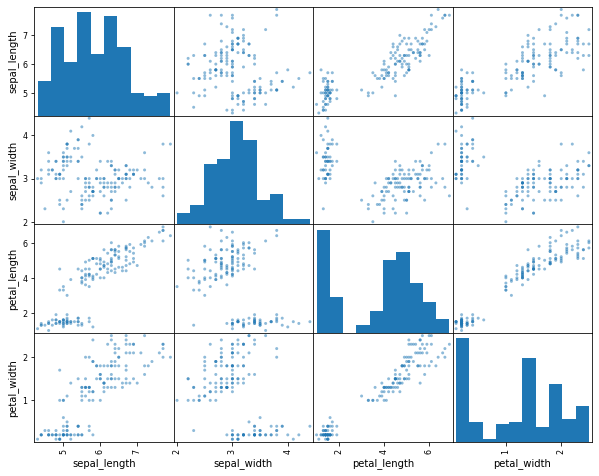

In [ ]:
#To understand the distribution of your dataset.
from pandas.plotting import scatter_matrix
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
scatter_matrix(df[attributes], figsize = (10,8))

In [ ]:
#Using One Hot encoder - 1/0
df_cat_to_array = pd.get_dummies(df)
df_cat_to_array = df_cat_to_array.drop("species_id", axis=1)
df_cat_to_array

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.10,3.50,1.40,0.20,1,0,0
1,4.90,3.00,1.40,0.20,1,0,0
2,4.70,3.20,1.30,0.20,1,0,0
3,4.60,3.10,1.50,0.20,1,0,0
4,5.00,3.60,1.40,0.20,1,0,0
...,...,...,...,...,...,...,...
145,6.70,3.00,5.20,2.30,0,0,1
146,6.30,2.50,5.00,1.90,0,0,1
147,6.50,3.00,5.20,2.00,0,0,1
148,6.20,3.40,5.40,2.30,0,0,1


In [ ]:
import lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

In [ ]:
X = df_cat_to_array .drop(["sepal_width"], axis=1)
Y = df_cat_to_array ["sepal_width"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

In [ ]:
models,pred = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:01<00:00, 25.21it/s]

[22:54:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.99,0.99,0.48,0.13
RandomForestRegressor,0.98,0.98,0.70,0.21
GradientBoostingRegressor,0.97,0.97,0.78,0.08
XGBRegressor,0.97,0.97,0.80,0.04
BaggingRegressor,0.97,0.97,0.83,0.03
LGBMRegressor,0.96,0.97,0.84,0.04
HistGradientBoostingRegressor,0.96,0.97,0.85,0.14
SVR,0.94,0.95,1.05,0.01
NuSVR,0.94,0.94,1.12,0.02
